# e-Commerce Sales Prediction

 ## Import necessary Pacakges

In [1]:
# Supress warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from scipy import stats
%matplotlib inline
import datetime

In [3]:
# importing all required packages for building Linear regression model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
# Configuring maximum rows & columns 
pd.set_option("display.max_columns" , 500)
pd.set_option("display.max.rows" , 600)

## Read & Understand the Data 

In [5]:
# Read the data
customer_data = pd.read_csv("Ecommerce Customers.csv")

In [6]:
# Check the top 5 records of the customer_data

customer_data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [7]:
# Check the bottom 5 records of the customer_data

customer_data.tail()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510
499,hannahwilson@davidson.com,49791 Rachel Heights Apt. 898\nEast Drewboroug...,DarkMagenta,33.715981,12.418808,35.771016,2.735160,497.778642


In [8]:
# Inspecting shape of the dataframe

customer_data.shape

(500, 8)

In [9]:
# Inspecting the no.of records, columns, data types, not null count records 

customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [10]:
# Checking the column names:

customer_data.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [11]:
# Checking the statistical Summary of the dataset

customer_data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


#####  No mising values or no negative values present

## Data Cleaning

#### Missing values

In [12]:
# Check the Null values count in each varaible
customer_data.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

 No missing values found

#### Duplicated values

In [13]:
# Check the Duplicates of the dataset
customer_data.duplicated().sum()

0

### New Feature Creation

#### Lets create new feature Email_Account which will help us futher in analysis

In [14]:
# Lets create a new Email_Address
customer_data['Email'][0].split('@')[1]

'fernandez.com'

In [15]:
def account(x):
    return x.split('@')[1]


In [16]:
# Lets create a new feature 'Email_Account'
customer_data['Email_Account'] = customer_data['Email'].apply(lambda x : account(x))

In [17]:
customer_data['Email_Account'].value_counts(normalize = True) * 100

gmail.com                 17.4
hotmail.com               17.4
yahoo.com                 15.2
jackson.com                0.4
davis.com                  0.4
barber.com                 0.4
edwards.com                0.4
lee.com                    0.4
moore.com                  0.4
johnson.com                0.4
williams.com               0.4
jones.com                  0.4
simmons.net                0.2
hoffman-wolfe.org          0.2
mccarthy.com               0.2
kelly-nunez.org            0.2
robinson.org               0.2
walsh-obrien.net           0.2
baldwin.com                0.2
hamilton-jensen.org        0.2
harrison.com               0.2
estes-nguyen.com           0.2
anderson.org               0.2
harris.org                 0.2
walter-martinez.com        0.2
jenkins.info               0.2
mcdonald-williams.com      0.2
anderson.com               0.2
pierce-kane.info           0.2
saunders.info              0.2
ford.biz                   0.2
contreras.info             0.2
salas.co

Lets create a new features State , Zip code which might help us in understanding the sales prediction 

In [18]:
customer_data['Address'].head()

0         835 Frank Tunnel\nWrightmouth, MI 82180-9605
1       4547 Archer Common\nDiazchester, CA 06566-8576
2    24645 Valerie Unions Suite 582\nCobbborough, D...
3     1414 David Throughway\nPort Jason, OH 22070-1220
4    14023 Rodriguez Passage\nPort Jacobville, PR 3...
Name: Address, dtype: object

In [19]:
customer_data['Address'][1].split(' ')[-2]

'CA'

In [20]:
def states(x):
    return x.split(' ')[-2]


In [21]:
# Lets create a new feature 'State'
customer_data['State'] = customer_data['Address'].apply(lambda x : states(x))

In [22]:
#Lets find the new value counts 
customer_data['State'].value_counts(normalize = True) * 100

AE    3.6
AA    3.4
SC    2.6
DE    2.6
MO    2.6
OR    2.4
VT    2.4
MN    2.2
MS    2.2
KS    2.2
FL    2.2
AP    2.2
NC    2.0
NJ    2.0
WV    1.8
ME    1.8
MI    1.8
HI    1.8
ND    1.8
AS    1.8
AZ    1.8
AL    1.8
IL    1.6
TX    1.6
PA    1.6
GA    1.6
FM    1.6
KY    1.6
NY    1.6
MT    1.6
RI    1.4
AK    1.4
WY    1.4
MH    1.4
NH    1.4
MA    1.4
PR    1.4
IA    1.4
OK    1.4
SD    1.4
IN    1.4
DC    1.4
LA    1.2
GU    1.2
AR    1.2
CA    1.2
VI    1.2
NV    1.2
NM    1.2
PW    1.2
VA    1.2
NE    1.2
MP    1.0
CT    1.0
MD    1.0
UT    1.0
CO    1.0
OH    1.0
WI    1.0
TN    1.0
WA    0.8
ID    0.6
Name: State, dtype: float64

In [23]:
customer_data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Email_Account,State
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054,fernandez.com,MI
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,hotmail.com,CA
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,yahoo.com,DC
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,gmail.com,OH
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,davidson-herman.com,PR


#### Outliers handling

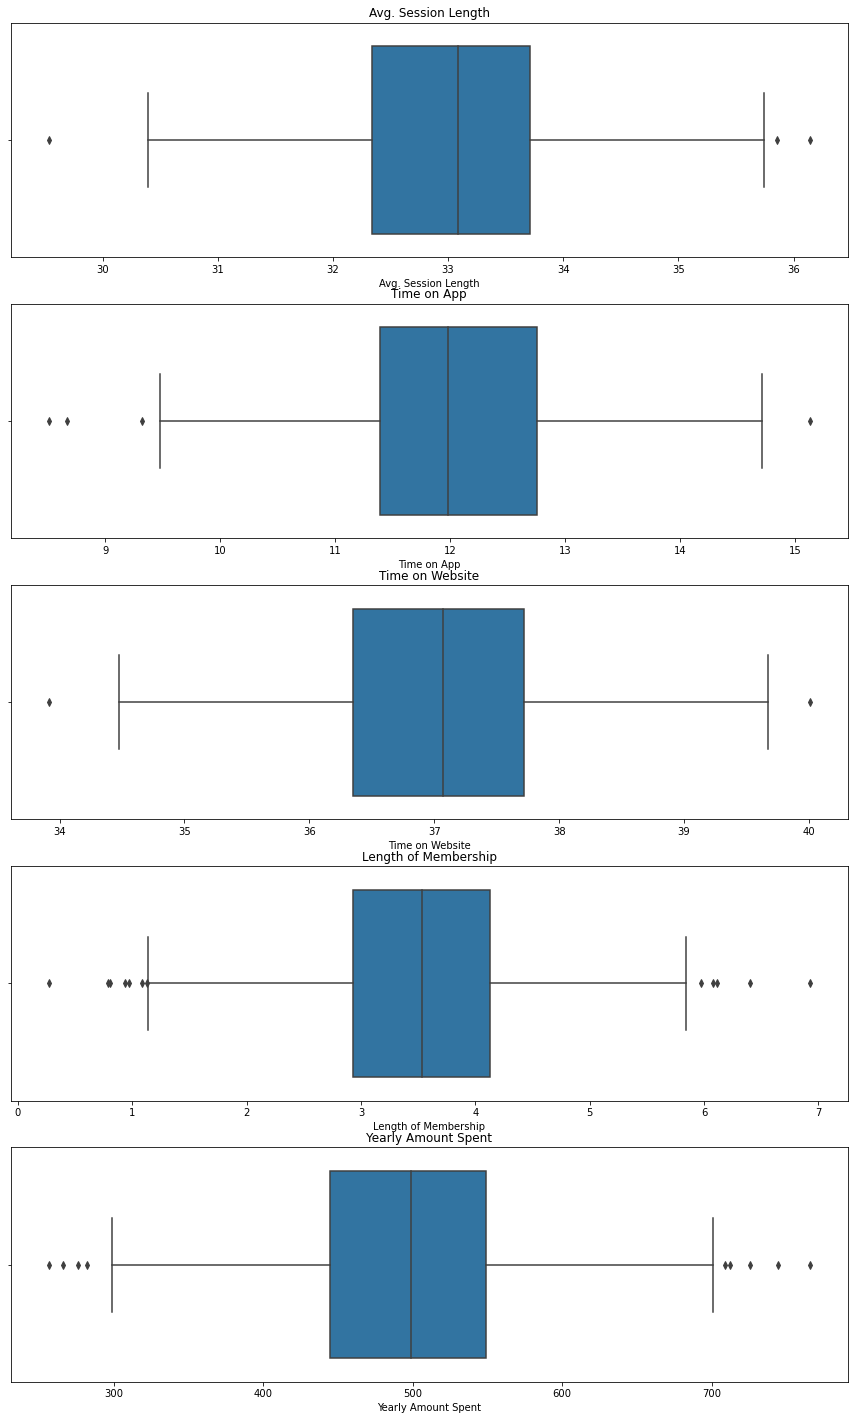

In [24]:
plt.figure(figsize = (15,25))

plt.subplot(5,1,1)
sns.boxplot(customer_data['Avg. Session Length'] )
plt.title('Avg. Session Length')

plt.subplot(5,1,2)
sns.boxplot(customer_data['Time on App'] )
plt.title('Time on App')

plt.subplot(5,1,3)
sns.boxplot(customer_data['Time on Website'])
plt.title('Time on Website')

plt.subplot(5,1,4)
sns.boxplot(customer_data['Length of Membership'])
plt.title('Length of Membership')

plt.subplot(5,1,5)
sns.boxplot(customer_data['Yearly Amount Spent'])
plt.title('Yearly Amount Spent')

plt.show()

- Outliers are present for the all the columns lets cap them at Upper & Lower whiskers

In [25]:
# cap the oultier for the 'Avg. Session Length' column with Upper & lower whisker values

Q3 = customer_data['Avg. Session Length'].quantile(0.99)
Q1 = customer_data['Avg. Session Length'].quantile(0.01)
IQR = Q3-Q1
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Capping the Outliers above 99th Quantile with Upper Whisker value.
# Lets take the data from Lower_whisker to Upper_Whisker
customer_data = customer_data[(customer_data['Avg. Session Length'] >= lower_whisker) & (customer_data['Avg. Session Length'] <= upper_whisker)]

In [26]:
# cap the oultier for the 'Time on App' column with Upper & lower whisker values

Q3 = customer_data['Time on App'].quantile(0.99)
Q1 = customer_data['Time on App'].quantile(0.01)
IQR = Q3-Q1
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Capping the Outliers above 99th Quantile with Upper Whisker value.
# Lets take the data from Lower_whisker to Upper_Whisker
customer_data = customer_data[(customer_data['Time on App'] >= lower_whisker) & (customer_data['Time on App'] <= upper_whisker)]

In [27]:
# cap the oultier for the 'Time on Website' column with Upper & lower whisker values

Q3 = customer_data['Time on Website'].quantile(0.99)
Q1 = customer_data['Time on Website'].quantile(0.01)
IQR = Q3-Q1
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Capping the Outliers above 99th Quantile with Upper Whisker value.
# Lets take the data from Lower_whisker to Upper_Whisker
customer_data = customer_data[(customer_data['Time on Website'] >= lower_whisker) & (customer_data['Time on Website'] <= upper_whisker)]

In [28]:
# cap the oultier for the 'Length of Membership' column with Upper & lower whisker values

Q3 = customer_data['Length of Membership'].quantile(0.99)
Q1 = customer_data['Length of Membership'].quantile(0.01)
IQR = Q3-Q1
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Capping the Outliers above 99th Quantile with Upper Whisker value.
# Lets take the data from Lower_whisker to Upper_Whisker
customer_data = customer_data[(customer_data['Length of Membership'] >= lower_whisker) & (customer_data['Length of Membership'] <= upper_whisker)]

In [29]:
# cap the oultier for the 'Yearly Amount Spent' column with Upper & lower whisker values

Q3 = customer_data['Yearly Amount Spent'].quantile(0.99)
Q1 = customer_data['Yearly Amount Spent'].quantile(0.01)
IQR = Q3-Q1
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Capping the Outliers above 99th Quantile with Upper Whisker value.
# Lets take the data from Lower_whisker to Upper_Whisker
customer_data = customer_data[(customer_data['Yearly Amount Spent'] >= lower_whisker) & (customer_data['Yearly Amount Spent'] <= upper_whisker)]

### Data Visualization

#### Univariate Analysiss

#### Lets the check the top 10 Avatars

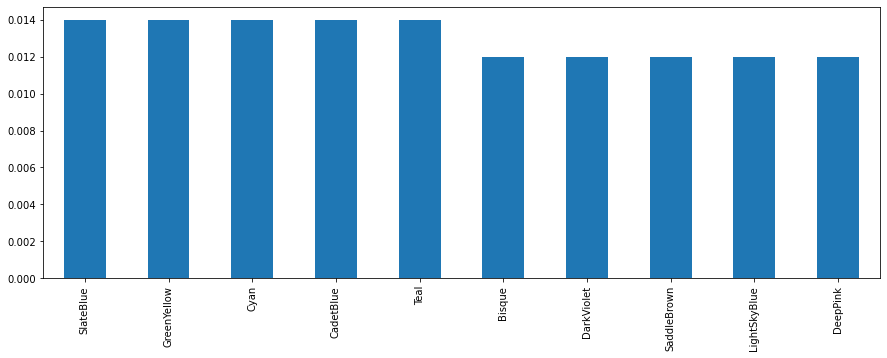

In [30]:
plt.figure(figsize = (15,5))
customer_data['Avatar'].value_counts(normalize = True).head(10).plot.bar()
plt.show()

#### Lets check the top 10 Email Accounts used

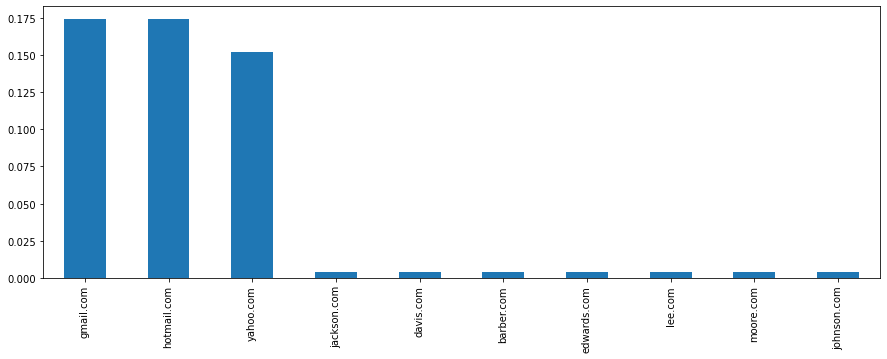

In [31]:
plt.figure(figsize = (15,5))
customer_data['Email_Account'].value_counts(normalize = True).head(10).plot.bar()
plt.show()

#### Lets check the top 10 states that consume sales

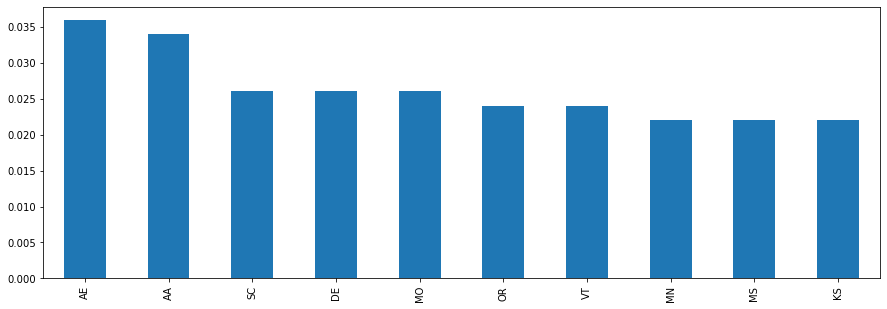

In [32]:
plt.figure(figsize = (15,5))
customer_data['State'].value_counts(normalize = True).head(10).plot.bar()
plt.show()

#### Lets check the distribution of the 'Yearly Amount Spent'

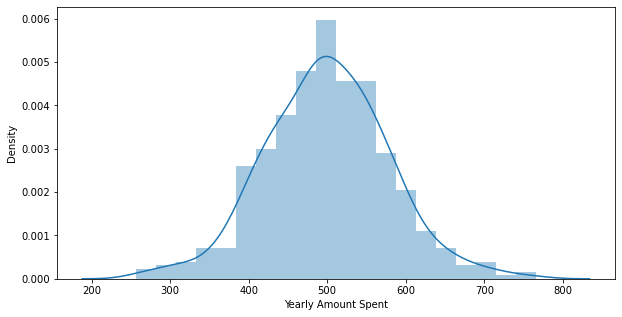

In [33]:
# lets plot distribution of all the variables
plt.figure(figsize = (10,5))
sns.distplot(customer_data['Yearly Amount Spent'])
plt.show()

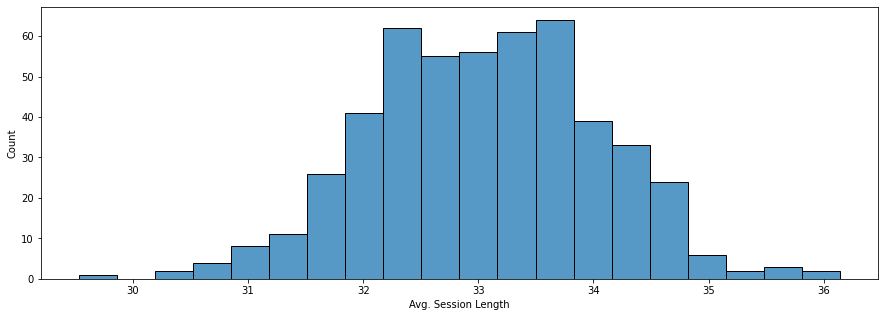

In [34]:
plt.figure(figsize = (15,5))
sns.histplot(customer_data['Avg. Session Length'] , bins = 20)
plt.show()

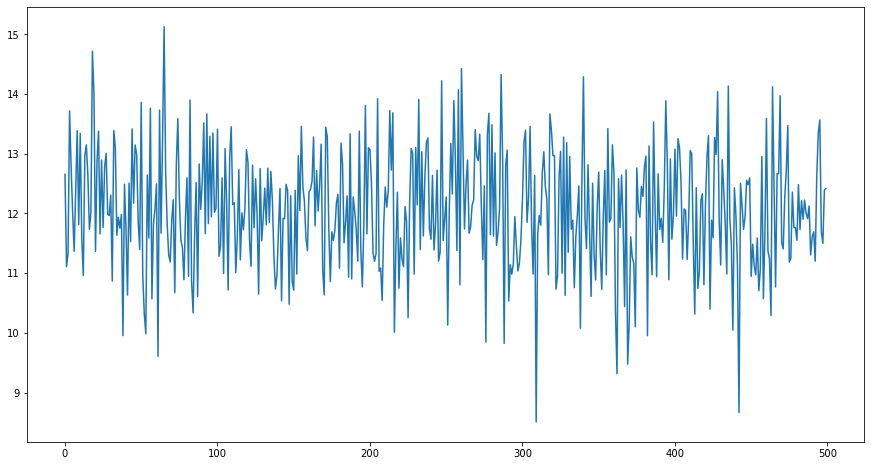

In [35]:
# lets plot distribution of all the variables
plt.figure(figsize = (15,8))
plt.plot(customer_data['Time on App'])
plt.show()

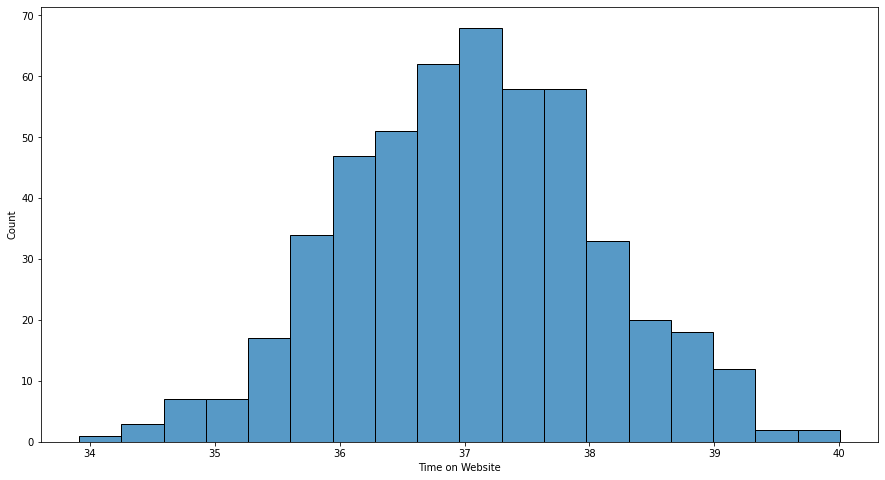

In [36]:
# lets plot distribution of all the variables
plt.figure(figsize = (15,8))
sns.histplot(customer_data['Time on Website'] )
plt.show()

#### Lets check the distribution of the "Avg. Session Length", "Time on App",	"Time on Website",	"Length of Membership", "Yearly Amount Spent"	

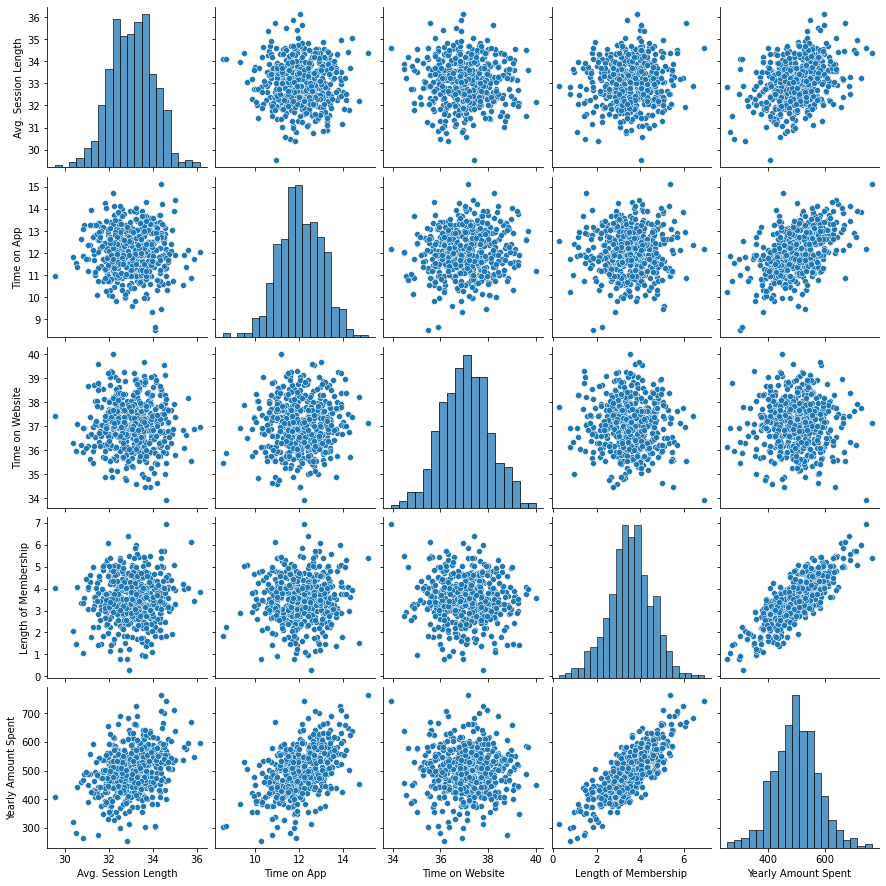

In [37]:
sns.pairplot(customer_data)

Observations:
1. Lenght of memebrship & Yearly Amount Spent have positive linear relationship between them
2. All other variables data points are scattered and no pattern / clusters observed.

#### Lets plot a jointplot for "Length of Membership", "Yearly Amount Spent"

<Figure size 720x576 with 0 Axes>

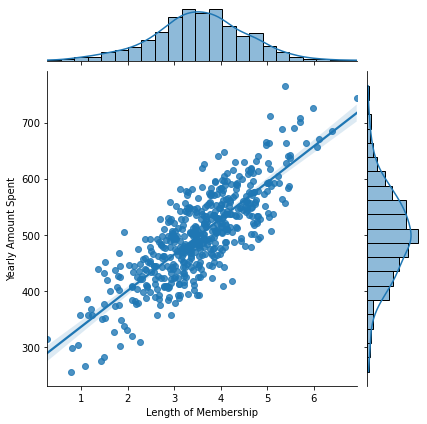

In [38]:
plt.figure(figsize = (10,8))
sns.jointplot(x = customer_data['Length of Membership'] , y = customer_data['Yearly Amount Spent'] , kind = 'reg')
plt.show()

#### Correlation matrix

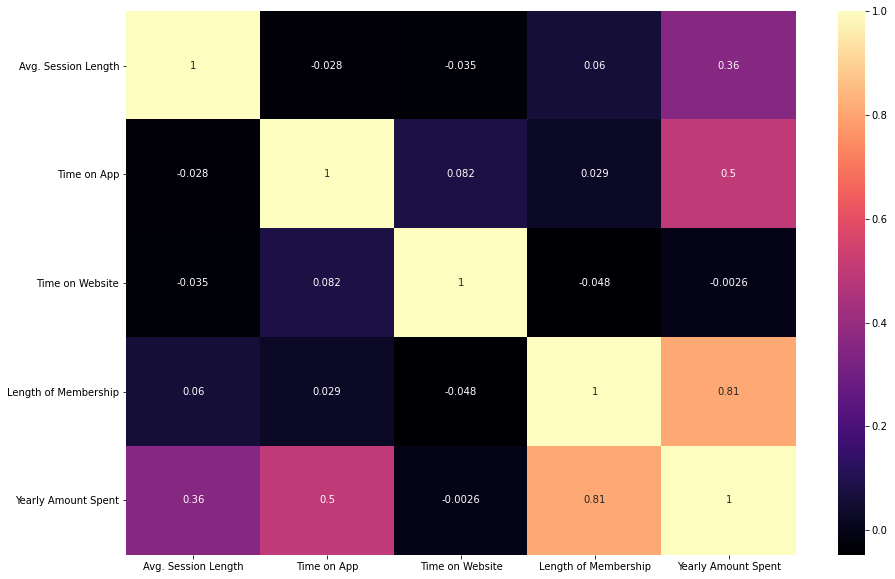

In [39]:
plt.figure(figsize = (15,10))
sns.heatmap(customer_data.corr() , cmap = 'magma' , annot = True)
plt.show()

- There is negeative correlation between Avg Session Length - Time on website , Avg Session Length-'Time on Website'

### Train & Test data Split

In [40]:
# Create a list of numerical columns
num_cols = customer_data.select_dtypes('number').columns

# Lets split the data to df_train , df_test, y_train 
df_train, df_test = train_test_split(customer_data[num_cols] , train_size = 0.7, test_size = 0.3 , random_state = 50)

In [41]:
df_train.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
3,34.305557,13.717514,36.721283,3.120179,581.852344
202,31.525752,11.340036,37.039514,3.811248,443.965627
35,33.616038,11.936386,38.768641,3.649286,521.883573
334,31.976480,10.757131,36.595868,1.977007,330.594446
55,33.925297,11.588655,35.252242,3.392050,483.673308


In [42]:
df_test.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
331,32.274594,12.954811,37.108816,3.689917,533.040060
374,31.447446,10.101632,38.043453,4.238296,418.602742
434,33.666616,10.985764,36.352503,0.936498,304.135592
354,32.386969,12.717995,35.128822,3.481062,508.771907
345,33.894640,10.610537,37.977389,3.537124,461.790959


In [45]:
df_train.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
3,34.305557,13.717514,36.721283,3.120179,581.852344
202,31.525752,11.340036,37.039514,3.811248,443.965627
35,33.616038,11.936386,38.768641,3.649286,521.883573
334,31.976480,10.757131,36.595868,1.977007,330.594446
55,33.925297,11.588655,35.252242,3.392050,483.673308


In [46]:
df_test.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
331,32.274594,12.954811,37.108816,3.689917,533.040060
374,31.447446,10.101632,38.043453,4.238296,418.602742
434,33.666616,10.985764,36.352503,0.936498,304.135592
354,32.386969,12.717995,35.128822,3.481062,508.771907
345,33.894640,10.610537,37.977389,3.537124,461.790959


### Rescaling the features

In [47]:
# Lets Rescale the features with MinMaxScaler make them on a comparable scale

# Instantiate a Scaler Object
scaler = MinMaxScaler()

In [48]:
# Apply scaler on df_train to fit_transform the data

df_train[num_cols] = scaler.fit_transform(df_train[num_cols])

# Apply scaler to df_test to transform the data

df_test[num_cols] = scaler.transform(df_test[num_cols])

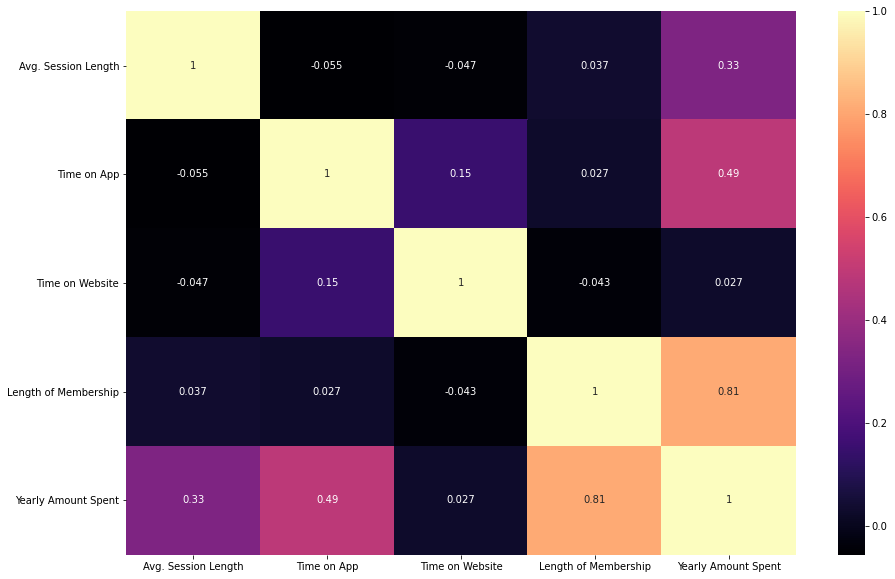

In [49]:
# Plot a heat map to check the mutlicollinearity

plt.figure(figsize = (15,10))
sns.heatmap(df_train.corr() , cmap = 'magma' , annot = True)
plt.show()

### Dividing into X and Y sets for the model building

In [50]:
# Lets divide the data to y_train
y_train = df_train.pop('Yearly Amount Spent')

In [51]:
# Lets divide the data to X_test
X_train = df_train

In [52]:
y_train.head()

3      0.687197
202    0.387116
35     0.556688
334    0.140388
55     0.473531
Name: Yearly Amount Spent, dtype: float64

In [53]:
X_train.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
3,0.722409,0.880207,0.405984,0.487619
202,0.301688,0.478493,0.463548,0.605845
35,0.618051,0.579256,0.776325,0.578137
334,0.369905,0.380002,0.383298,0.292048
55,0.664857,0.520501,0.140254,0.534130


### Building a Linear Model with all Variables

In [54]:
# Add a constant :
X_train_sm = sm.add_constant(X_train)

# Create a linear & fit Model 
lm_1 = sm.OLS(y_train , X_train_sm).fit()

#Check the params
lm_1.params

const                  -0.427699
Avg. Session Length     0.369133
Time on App             0.498561
Time on Website         0.002496
Length of Membership    0.786022
dtype: float64

In [55]:
#Check the Statistical Model Summary :
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.986
Model:                             OLS   Adj. R-squared:                  0.985
Method:                  Least Squares   F-statistic:                     5879.
Date:                 Fri, 03 Sep 2021   Prob (F-statistic):          7.16e-316
Time:                         22:41:59   Log-Likelihood:                 861.23
No. Observations:                  350   AIC:                            -1712.
Df Residuals:                      345   BIC:                            -1693.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.4277      0.007    -59.157      0.000      -0.442      -0.413
Avg. Session Length      0.3691      0.007     50.733      0.000       0.355       0.383
Time on App              0.4986      0.007     73.451      0.000       0.485       0.512
Time on Website          0.0025      0.006      0.398      0.691      -0.010       0.015
Length of Membership     0.7860      0.006    121.598      0.000       0.773       0.799
==============================================================================
Omnibus:                        0.559   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.756   Jarque-Bera (JB):                0.344
Skew:                          -0.021   Prob(JB):                        0.842
Kurtosis:                       3.147   Cond. No.                         13.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Check VIF

In [56]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Time on App,10.77
3,Length of Membership,8.96
0,Avg. Session Length,8.92
2,Time on Website,6.96


##### Observations:
- R2 = 0.986
- Adj R2 = 0.985
- 'Time on Website' has the high p-value , its highly insignificant model,we can drop it & build a new model
- 'Time on App' has high VIF

### Prediction on Test data

#### Diving Data into X_test & y_test

In [58]:
# Lets divide the data to y_train
y_test = df_test.pop('Yearly Amount Spent')

In [59]:
# Lets divide the data to X_test
X_test = df_test

In [60]:
# Adding constant variable to test dataframe
X_test_sm = sm.add_constant(X_test)

In [61]:
# Making predictions using the model

y_test_pred = lm_1.predict(X_test_sm)

In [62]:
y_test_pred.head()

331    0.561168
374    0.348767
434    0.102469
354    0.518518
345    0.434041
dtype: float64

### Model Evaluation

Text(0, 0.5, 'y_test_pred')

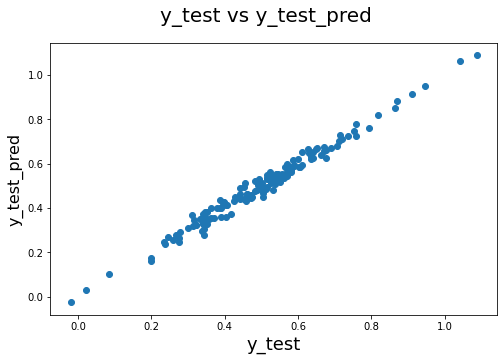

In [68]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize = (8,5))
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16) 

#### Final Conclusion:

- We have build a Linear Regression model with the 4 variablesas below

#### Yearly Amount Spent = 0.786022(Length of Membershi) + 0.498561(Time on App) + 0.369133(Avg. Session Length) + 0.002496(Time on Website) - 0.427699
 
- "Length of Membership" seems to be the most significant feature.
- "Time on App" seems to be the 2nd important significant feature
- "Avg. Session Length" seems to be the 3rd important significant feature

##### For a change in each variable keeping all other variables constant the below changes happen,
 - Avg. Session Length    - 0.369133 => For a unit increase, Yearly Amount Spent increases by 0.369133 times 
 - Time on App            - 0.498561 => For a unit increase, Yearly Amount Spent increases by 0.498561 times
 - Time on Website        - 0.002496 => For a unit increase, Yearly Amount Spent increases by 0.002496 times
 - Length of Membership   - 0.786022 => For a unit increase, Yearly Amount Spent increases by 0.786022 times

### Model Evaluation

In [69]:
# calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 0.019050008720095015
Mean Squared Error: 0.0005603845615912242
Root Mean Squared Error: 0.02367244308454926


In [86]:
# R-Squared of Test set

from sklearn.metrics import r2_score
R2_test = r2_score(y_test, y_test_pred)
R2_test

0.9814113750664748

In [87]:
# Difference in R2 of train  & r2 test
R2 = 0.986
R2 -  R2_test

0.004588624933525187

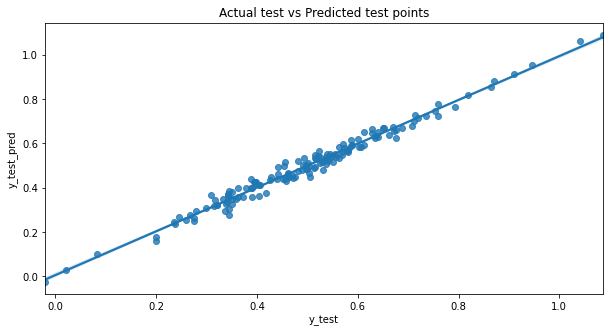

In [72]:
# Regression plot 
plt.figure(figsize = (10,5))
sns.regplot(y_test,y_test_pred)
plt.title("Actual test vs Predicted test points")
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.show()

AttributeError: 'Summary' object has no attribute 'get_values'